In [74]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities_v3 import *
from shutil import copyfile

plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [75]:
def plotting(var_list,legend_list):
    i=0
    for var in var_list:
        i += 1
        x = range(len(var))
        plt.plot(x,var,linestyle="",marker="*",markersize=15,label=legend_list[i-1])
    plt.legend()    
    plt.show()
    return

In [76]:
fdir = "/data/new_trap_processed/mockfiles/20200320/output/noise/Batch2_NR/"


In [77]:
run_no= np.load(fdir+"run_no.npy")
alpha_scale_in = np.load(fdir+"alpha_scale_in.npy")
lambda_val_in = np.load(fdir+"lambda_val_in.npy")
direction_in = np.load(fdir+"direction_in.npy")
phase_shift_in = np.load(fdir+"phase_shift_in.npy")


In [78]:
run_no_true = []
results_true = []
lambda_true = []
direction_true = []
phase_shift_true = []
for i in range(len(run_no)):
    run_no_true.append(run_no[i])
    results_true.append(alpha_scale_in[i])
    lambda_true.append(lambda_val_in[i])
    direction_true.append(direction_in[i])
    phase_shift_true.append(phase_shift_in[i])
    

In [79]:
# (l=5um, +) (l=5um, -) (l=10um, +) (l=10um, -) (l=25um, +) (l=25um, -)
# 95% CL
results_from_akio= np.loadtxt("akio20.txt")

In [80]:
run_no_a = []
l5p = []
l5m = []
l10p = []
l10m = []
l25p = []
l25m = []

for results in results_from_akio:
    a,b,c,d,e,f,g = results
    run_no_a.append(a)
    l5p.append(b)
    l5m.append(c)
    l10p.append(d)
    l10m.append(e)
    l25p.append(f)
    l25m.append(g)


In [81]:
df_raw=pd.DataFrame()

In [82]:
df_raw["run_no_true"]=run_no_true
df_raw["alpha"]=results_true
df_raw["lambda"]=lambda_true
df_raw["direction"]=direction_true
df_raw["phase_val"]=phase_shift_true



In [83]:
df = df_raw.sort_values(by=['run_no_true']).reset_index()

In [84]:
results_from_akio[0]

array([  0.00000000e+00,   2.10000000e+08,  -2.40000000e+08,
         4.00000000e+07,  -4.00000000e+07,   2.00000000e+07,
        -3.00000000e+07])

In [85]:
df["akio_alpha_l5_p"]=l5p
df["akio_alpha_l10_p"]=l10p
df["akio_alpha_l25_p"]=l25p
df["akio_alpha_l5_n"]=l5m
df["akio_alpha_l10_n"]=l10m
df["akio_alpha_l25_n"]=l25m


In [86]:
df

,index,run_no_true,alpha,lambda,direction,phase_val,akio_alpha_l5_p,akio_alpha_l10_p,akio_alpha_l25_p,akio_alpha_l5_n,akio_alpha_l10_n,akio_alpha_l25_n
0,0,0,5.000000e+07,10,push,TF,210000000.0,40000000.0,20000000.0,-2.400000e+08,-4.000000e+07,-3.000000e+07
1,1,1,6.371375e+07,10,push,TF,180000000.0,40000000.0,20000000.0,-4.000000e+08,-7.000000e+07,-4.000000e+07
2,2,2,8.118884e+07,10,push,TF,180000000.0,30000000.0,20000000.0,-4.400000e+08,-8.000000e+07,-4.000000e+07
3,3,3,1.034569e+08,10,push,TF,170000000.0,30000000.0,20000000.0,-5.200000e+08,-1.000000e+08,-5.000000e+07
4,4,4,1.318325e+08,10,push,TF,170000000.0,30000000.0,20000000.0,-6.800000e+08,-1.200000e+08,-7.000000e+07
5,5,5,1.679909e+08,10,push,TF,170000000.0,40000000.0,20000000.0,-8.000000e+08,-1.400000e+08,-7.000000e+07
6,6,6,2.140666e+08,10,push,TF,170000000.0,30000000.0,20000000.0,-1.010000e+09,-1.800000e+08,-9.000000e+07
7,7,7,2.727797e+08,10,push,TF,170000000.0,30000000.0,20000000.0,-1.390000e+09,-2.500000e+08,-1.200000e+08
8,8,8,3.475964e+08,10,push,TF,170000000.0,30000000.0,20000000.0,-1.950000e+09,-3.500000e+08,-1.700000e+08
9,9,9,4.429334e+08,10,push,TF,170000000.0,30000000.0,20000000.0,-2.520000e+09,-4.400000e+08,-2.200000e+08


In [87]:
t1 = df.alpha/1e8
print(t1)
print(len(t1))

0      0.500000
1      0.637137
2      0.811888
3      1.034569
4      1.318325
5      1.679909
6      2.140666
7      2.727797
8      3.475964
9      4.429334
10     5.644189
11     7.192249
12     9.164904
13    11.678607
14    14.881757
15    18.963451
16    24.164651
17    30.792411
18    39.237999
19    50.000000
Name: alpha, dtype: float64
20


In [88]:
a1 = df.akio_alpha_l10_n/1e8
a2 = df.akio_alpha_l10_p/1e8

print(a1)
print(len(a1))

0     -0.4
1     -0.7
2     -0.8
3     -1.0
4     -1.2
5     -1.4
6     -1.8
7     -2.5
8     -3.5
9     -4.4
10    -5.8
11    -7.7
12    -9.8
13   -12.5
14   -16.3
15   -20.9
16   -26.6
17   -34.3
18   -43.8
19   -56.1
Name: akio_alpha_l10_n, dtype: float64
20


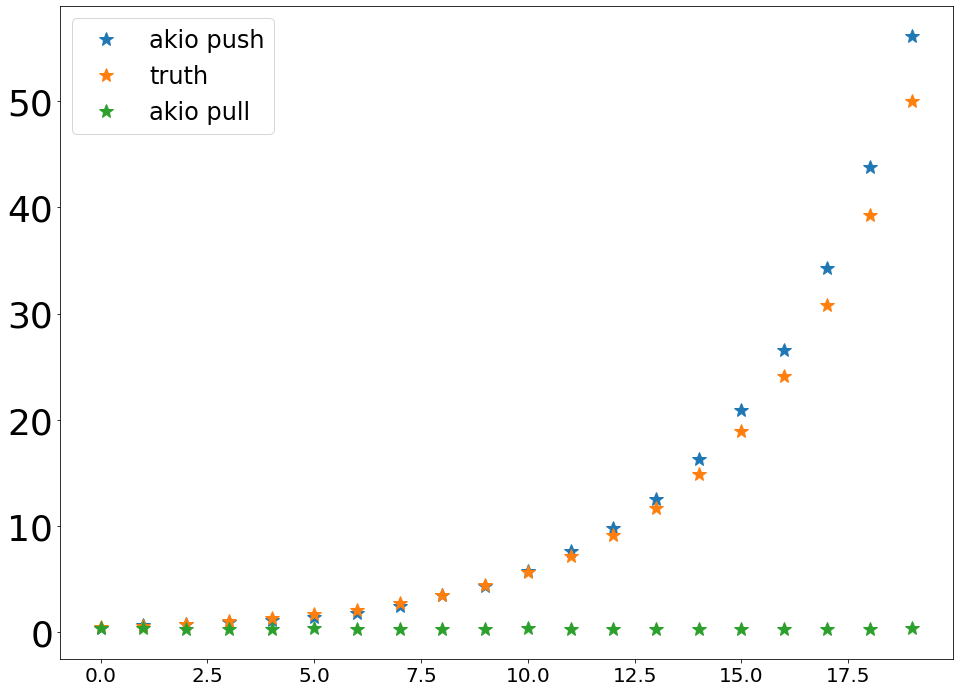

(0.0, 10.0)

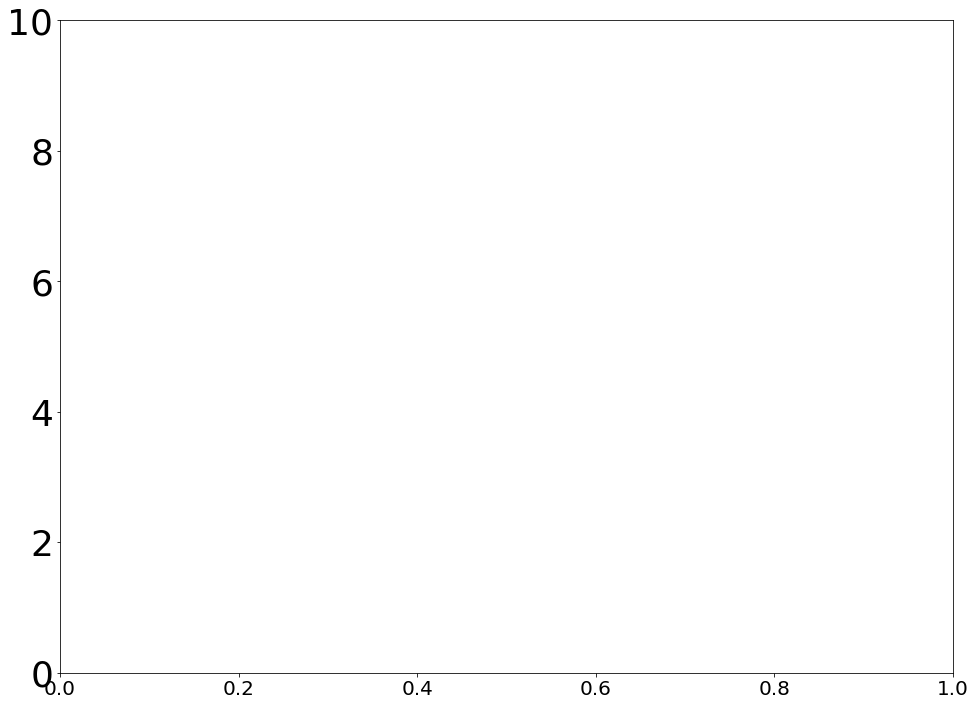

In [89]:
plotting([np.abs(a1),t1,np.abs(a2)],["akio push","truth","akio pull"])
plt.ylim(0,10)